Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
path_to_train_directory='gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train'
path_to_test_directory='gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Test'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.





In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(path_to_train_directory)
data_dir_test = pathlib.Path(path_to_test_directory)

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
train_ds_copy = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

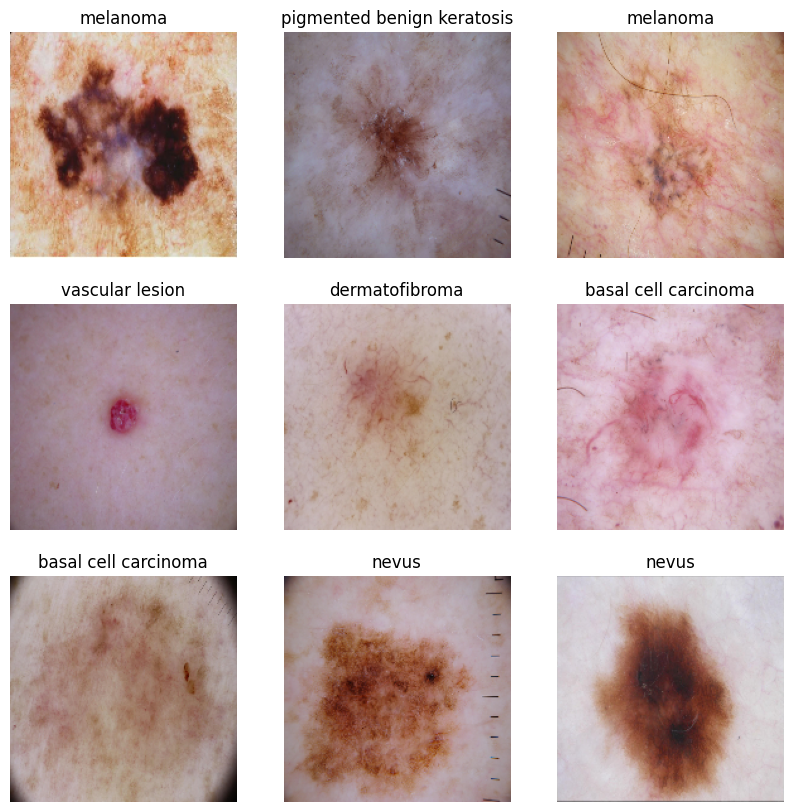

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here(not using this as o/p is same everytime)
###normalization_layer=layers.experimental.preprocessing.Rescaling(scale=1./255)
##normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
##image_batch, labels_batch = next(iter(normalized_ds))
##first_image = image_batch[0]
##print(np.min(first_image), np.max(first_image))

0.058823112 0.81356215


In [ ]:
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
56/56 [==============================] - 471s 2s/step - loss: 2.0285 - accuracy: 0.2310 - val_loss: 1.8858 - val_accuracy: 0.3266
Epoch 2/3
56/56 [==============================] - 1s 20ms/step - loss: 1.7297 - accuracy: 0.3616 - val_loss: 1.9399 - val_accuracy: 0.3132
Epoch 3/3
56/56 [==============================] - 1s 19ms/step - loss: 1.6767 - accuracy: 0.4012 - val_loss: 1.4542 - val_accuracy: 0.5078


In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3735 - accuracy: 0.5017 - val_loss: 1.3547 - val_accuracy: 0.5347
Epoch 2/20
56/56 [==============================] - 1s 19ms/step - loss: 1.2947 - accuracy: 0.5658 - val_loss: 1.3104 - val_accuracy: 0.5548
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1703 - accuracy: 0.5848 - val_loss: 1.3380 - val_accuracy: 0.5660
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1557 - accuracy: 0.5831 - val_loss: 1.4584 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.0419 - accuracy: 0.6261 - val_loss: 1.4286 - val_accuracy: 0.5436
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 0.9419 - accuracy: 0.6568 - val_loss: 1.4120 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 1s 19ms/step - loss: 0.8712 - accuracy: 0.6819 - val_loss: 1.6928 - val_accuracy: 0.4966
Epoch 8/20
56

### Visualizing training results

[0.5016741156578064, 0.5658482313156128, 0.5848214030265808, 0.5831473469734192, 0.6261160969734192, 0.6568080186843872, 0.6819196343421936, 0.7025669813156128, 0.75, 0.7717633843421936, 0.7890625, 0.8275669813156128, 0.87109375, 0.8811383843421936, 0.8833705186843872, 0.8822544813156128, 0.9068080186843872, 0.9174107313156128, 0.9291294813156128, 0.921875]
[0.5346755981445312, 0.5548098683357239, 0.5659955143928528, 0.4787471890449524, 0.5436241626739502, 0.536912739276886, 0.4966442883014679, 0.5749440789222717, 0.5055928230285645, 0.536912739276886, 0.5145413875579834, 0.5257270932197571, 0.5279642343521118, 0.5570470094680786, 0.5480984449386597, 0.5257270932197571, 0.5055928230285645, 0.5190156698226929, 0.5525727272033691, 0.536912739276886]


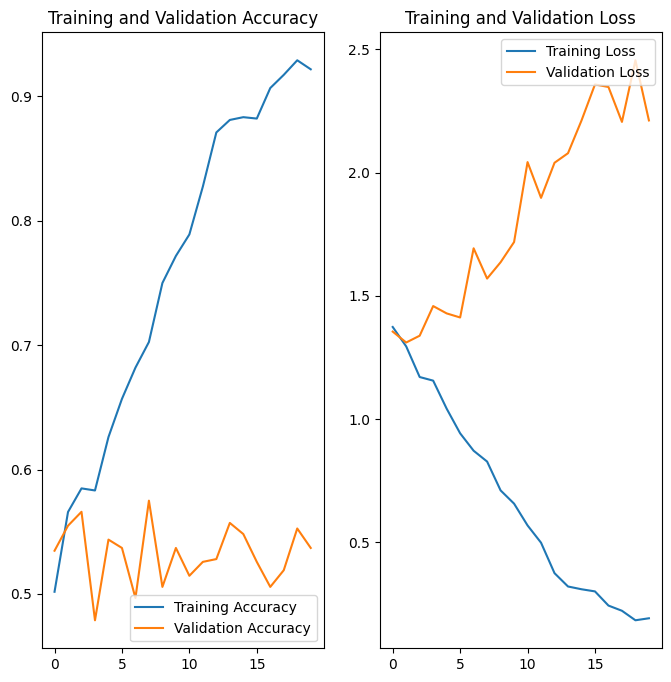

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print(acc)
print(val_acc)
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Text(0.5, 1.0, 'melanoma')

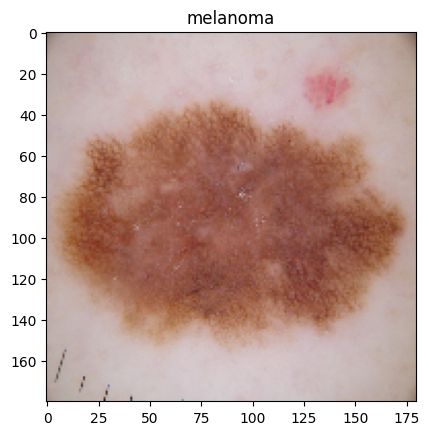

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
### 1)As per the graph and results we can easily determine that it is a situation of Overfitting. 
## 2)The last epoch shows huge difference between the validation accuracy and the training accuracy. Thus we have to overcome it.
# To reduce overfitting we can se augmentation strategies like flipping, rotation, blurring, rotation etc.
#let's use image brightness as the strategy for once

image, label = next(iter(train_ds))
plt.imshow(image[0].numpy()/255)
plt.title(class_names[label[0].numpy()])


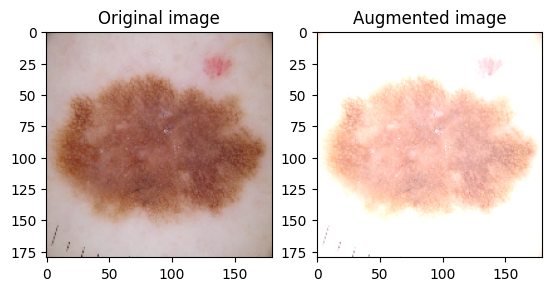

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here  
### Here I have tried using brightness
def augment(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

bright = tf.image.adjust_brightness(image[0].numpy()/255, 0.4)
augment(image[0].numpy()/255, bright)

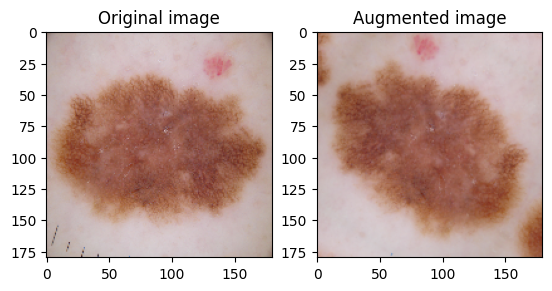

In [ ]:
### Here I have tried using rotation and creating as a layer (This layer we will use ahead)

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])


augmented_image = data_augmentation(image[0].numpy()/255)

augment(image[0].numpy()/255,augmented_image)
  




### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = tf.keras.Sequential([  
  layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  layers.Conv2D(16, 3, activation='relu'),  
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),  
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=20
)## your training code


Epoch 1/20
56/56 [==============================] - 5s 36ms/step - loss: 1.9708 - accuracy: 0.2980 - val_loss: 1.6970 - val_accuracy: 0.3982
Epoch 2/20
56/56 [==============================] - 2s 32ms/step - loss: 1.6081 - accuracy: 0.4325 - val_loss: 1.5669 - val_accuracy: 0.4787
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4996 - accuracy: 0.4855 - val_loss: 1.4201 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 2s 27ms/step - loss: 1.4285 - accuracy: 0.4983 - val_loss: 1.4507 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3997 - accuracy: 0.5056 - val_loss: 1.3896 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 2s 27ms/step - loss: 1.3510 - accuracy: 0.5352 - val_loss: 1.3858 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3207 - accuracy: 0.5324 - val_loss: 1.3223 - val_accuracy: 0.5123
Epoch 8/20
56

### Visualizing the results

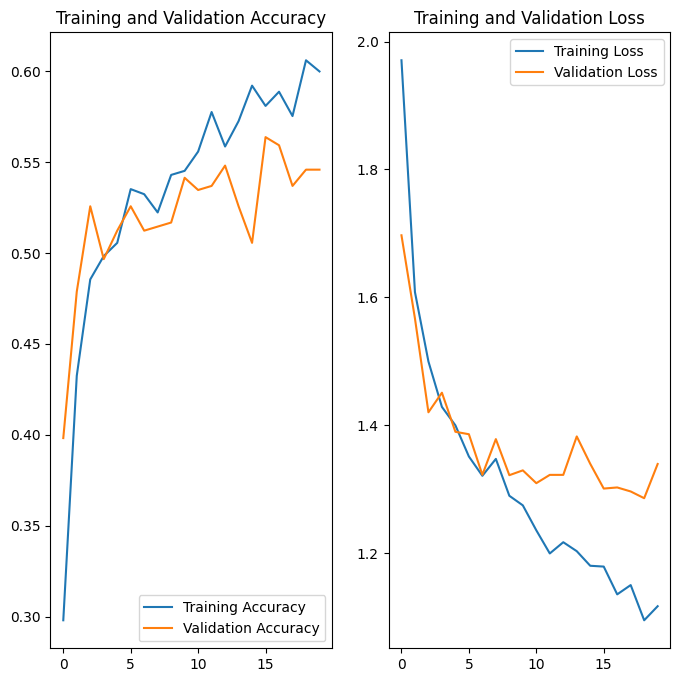

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


### **Overfitting has been reduced now  which is a big difference and the validation accuracy has been improved now** . The validation accuracy is a little better but not that great . Still we need to apply few more changes for better results.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

[ 92 309  77 352 277 370  58 142 115]


Text(0.5, 1.0, 'Class distribution in training set')

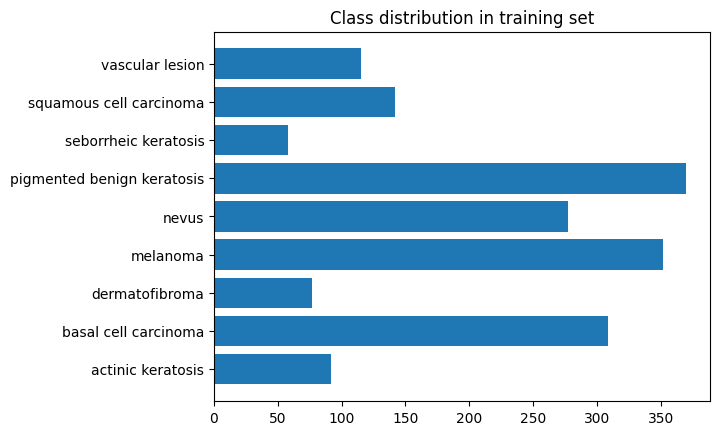

In [ ]:
## Your code goes here.

count = np.zeros(9, dtype=np.int32)
for _, labels in train_ds:
    y, _, c = tf.unique_with_counts(labels)
    count[y.numpy()] += c.numpy()
print(count)

plt.barh(class_names, count)
plt.title('Class distribution in training set')

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
## According to the data, **seborrheic keratosis** has the least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
## **pigmented benign keratosis** dominates the count in the number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset='gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F60CDE297C0>: 100%|██████████| 500/500 [00:21<00:00, 22.81 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F60CDDCCC10>: 100%|██████████| 500/500 [00:23<00:00, 21.04 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F60CDDD7880>: 100%|██████████| 500/500 [00:23<00:00, 20.86 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3872x2592 at 0x7F61641B2C10>: 100%|██████████| 500/500 [01:44<00:00,  4.80 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F60CDDA0820>: 100%|██████████| 500/500 [01:59<00:00,  4.20 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F60CD853790>: 100%|██████████| 500/500 [00:23<00:00, 21.22 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F61641A41F0>: 100%|██████████| 500/500 [00:50<00:00,  9.93 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F616437EB20>: 100%|██████████| 500/500 [00:24<00:00, 20.61 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F60CDD4B790>: 100%|██████████| 500/500 [00:23<00:00, 21.36 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4486


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011013.jpg_7bdb794c-0b26-4e1e-a8c2-cae00b0210bf.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010863.jpg_b3694c3d-ddf4-4749-b574-75f3d2c81be6.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011178.jpg_6f147c06-dfb7-47e5-9d9b-212644667c15.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010995.jpg_ef1ee1d2-8156-44d9-b05c-42b101cefb5c.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011077.jpg_8360937d-d8d8-4e89-a810-0a451b1b56fc.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/seborrheic keratosis/outpu

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
df2

,Path,Label
0,gdrive/My Drive/Colab Notebooks/CNN_assignment...,seborrheic keratosis
1,gdrive/My Drive/Colab Notebooks/CNN_assignment...,seborrheic keratosis
2,gdrive/My Drive/Colab Notebooks/CNN_assignment...,seborrheic keratosis
3,gdrive/My Drive/Colab Notebooks/CNN_assignment...,seborrheic keratosis
4,gdrive/My Drive/Colab Notebooks/CNN_assignment...,seborrheic keratosis
...,...,...
4481,gdrive/My Drive/Colab Notebooks/CNN_assignment...,actinic keratosis
4482,gdrive/My Drive/Colab Notebooks/CNN_assignment...,actinic keratosis
4483,gdrive/My Drive/Colab Notebooks/CNN_assignment...,actinic keratosis
4484,gdrive/My Drive/Colab Notebooks/CNN_assignment...,actinic keratosis


In [ ]:
df2['Label'].value_counts()

seborrheic keratosis          500
vascular lesion               500
dermatofibroma                500
melanoma                      500
pigmented benign keratosis    500
nevus                         500
squamous cell carcinoma       500
actinic keratosis             500
basal cell carcinoma          486
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=pathlib.Path('gdrive/My Drive/Colab Notebooks/CNN_assignment/Datasets/Train/')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6725 files belonging to 9 classes.
Using 5380 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6725 files belonging to 9 classes.
Using 1345 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
from tensorflow.keras.regularizers import l2
model = tf.keras.Sequential([  
  layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  layers.Conv2D(16, 3, activation='relu'),  
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, activation='relu'), 
  layers.BatchNormalization(),   
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Dense(9,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

#### **Todo:**  Train your model

In [16]:
epochs = 30
## Your code goes here, use 50 epochs.
history =model.fit(train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)
 # your model fit code


Epoch 1/30
169/169 [==============================] - 358s 2s/step - loss: 2.3471 - accuracy: 0.5494 - val_loss: 2.8613 - val_accuracy: 0.3732
Epoch 2/30
169/169 [==============================] - 345s 2s/step - loss: 2.3272 - accuracy: 0.5520 - val_loss: 2.9646 - val_accuracy: 0.3799
Epoch 3/30
169/169 [==============================] - 350s 2s/step - loss: 2.3335 - accuracy: 0.5578 - val_loss: 2.7187 - val_accuracy: 0.4379
Epoch 4/30
169/169 [==============================] - 349s 2s/step - loss: 2.5524 - accuracy: 0.5394 - val_loss: 3.8709 - val_accuracy: 0.2677
Epoch 5/30
169/169 [==============================] - 336s 2s/step - loss: 2.4121 - accuracy: 0.5580 - val_loss: 4.4315 - val_accuracy: 0.2587
Epoch 6/30
169/169 [==============================] - 357s 2s/step - loss: 2.4441 - accuracy: 0.5658 - val_loss: 3.3140 - val_accuracy: 0.3651
Epoch 7/30
169/169 [==============================] - 347s 2s/step - loss: 2.3842 - accuracy: 0.5704 - val_loss: 3.0593 - val_accuracy: 0.3792

#### **Todo:**  Visualize the model results

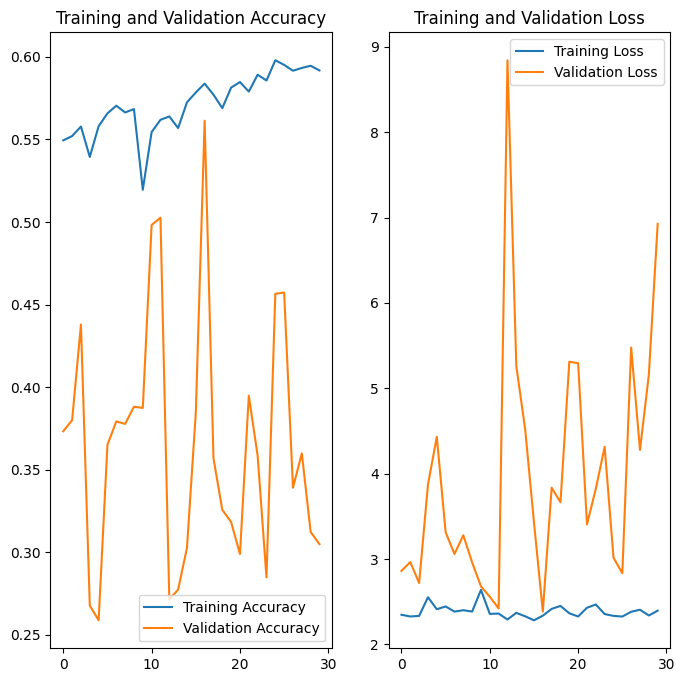

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



 I think it did not help in my case. Ideally class rebalancing and batch normalization reduces overfitting and improves the model. But here it is not the case